In [1]:
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import scipy
from tqdm import tqdm

In [9]:
f_Att = uproot.open('../root/MG5_aMC_v2_7_3/3b3lj/Events/run_02/tag_1_delphes_events.root')
f_ttW = uproot.open('../root/MG5_aMC_v2_7_3/ttW/Events/run_04/tag_1_delphes_events.root')
f_ttZ = uproot.open('../root/MG5_aMC_v2_7_3/ttZ/Events/run_02/tag_1_delphes_events.root')
f_tttt = uproot.open('../root/MG5_aMC_v2_7_3/tttt/Events/run_01/tag_1_delphes_events.root')

In [10]:
def fun(deltaeta, deltaphi):
    return np.sqrt(deltaeta**2 + deltaphi**2)

In [13]:
def define(f):
    # Define Trees
    tree_electron = f['Delphes;1/Electron']
    tree_muon = f['Delphes;1/Muon']
    tree_jet = f['Delphes;1/Jet']
    tree_Emiss = f['Delphes;1/MissingET']
    tree_Ht = f['Delphes;1/ScalarHT']
    
    # Define Branches
    electron = tree_electron.arrays(['Electron.Charge', 'Electron.PT', 'Electron.Eta', 'Electron.Phi'], library='ak')
    muon = tree_muon.arrays(['Muon.Charge', 'Muon.PT', 'Muon.Eta', 'Muon.Phi'], library='ak')
    jet = tree_jet.arrays(['Jet.Mass', 'Jet.BTag', 'Jet.PT', 'Jet.Eta', 'Jet.Phi'], library='ak')
    Emiss = tree_Emiss.arrays(['MissingET.MET', 'MissingET.Phi'], library='ak')
    Ht = tree_Ht.arrays(['ScalarHT.HT'])

    # Define Variables
    EventSize = len(jet['Jet.Mass'])
    jet_sort_pt = ak.sort(jet['Jet.PT'], axis=-1, ascending=False)
    jet_num = ak.num(jet['Jet.PT'], axis=-1)
    lepton_sort_pt = ak.sort(ak.concatenate([electron['Electron.PT'], muon['Muon.PT']], axis=-1), axis=-1, ascending=False)
    # lepton_charge = ak.Array.tolist(ak.concatenate([electron['Electron.Charge'], muon['Muon.Charge']], axis=-1))
    lepton_eta = ak.concatenate([electron['Electron.Eta'], muon['Muon.Eta']], axis=-1)
    lepton_phi = ak.concatenate([electron['Electron.Phi'], muon['Muon.Phi']], axis=-1)
    bjet_pt = jet['Jet.PT']*jet['Jet.BTag']
    bjet_eta = jet['Jet.Eta']*jet['Jet.BTag']
    bjet_phi = jet['Jet.Phi']*jet['Jet.BTag']
    Emiss = Emiss['MissingET.MET']
    # two_lepton = ak.where(ak.num(lepton_sort_pt)>=2)
    
    return EventSize, jet_sort_pt, jet_num, lepton_sort_pt, lepton_eta, lepton_phi, bjet_pt, bjet_eta, bjet_phi, Emiss

In [14]:
EventSize_tA, jet_sort_pt_tA, jet_num_tA, lepton_sort_pt_tA, lepton_eta_tA, lepton_phi_tA, bjet_pt_tA, bjet_eta_tA, bjet_phi_tA, Emiss_tA = define(f_Att)
EventSize_ttW, jet_sort_pt_ttW, jet_num_ttW, lepton_sort_pt_ttW, lepton_eta_ttW, lepton_phi_ttW, bjet_pt_ttW, bjet_eta_ttW, bjet_phi_ttW, Emiss_ttW = define(f_ttW)
EventSize_ttZ, jet_sort_pt_ttZ, jet_num_ttZ, lepton_sort_pt_ttZ, lepton_eta_ttZ, lepton_phi_ttZ, bjet_pt_ttZ, bjet_eta_ttZ, bjet_phi_ttZ, Emiss_ttZ = define(f_ttZ)
EventSize_tttt, jet_sort_pt_tttt, jet_num_tttt, lepton_sort_pt_tttt, lepton_eta_tttt, lepton_phi_tttt, bjet_pt_tttt, bjet_eta_tttt, bjet_phi_tttt, Emiss_tttt = define(f_tttt)

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5]


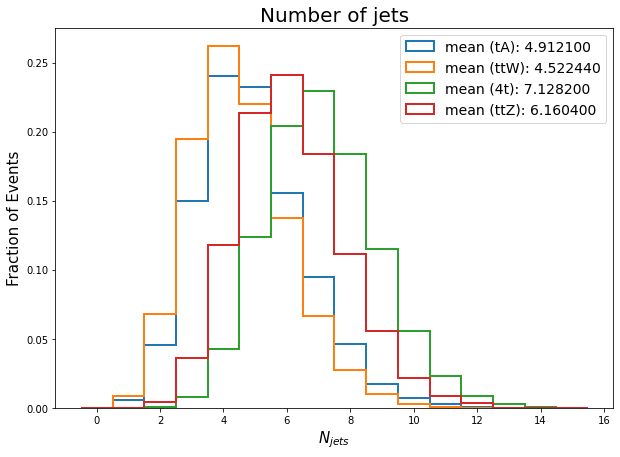

In [15]:
# Number of jets
plt.figure(figsize=(10,7)) 
bin = np.linspace(-0.5, 15.5, 17)
print(bin)
plt.hist(jet_num_tA, bins=bin, density=True, histtype='step', linewidth=2, label='mean (tA): %f' %np.mean(jet_num_tA))
plt.hist(jet_num_ttW, bins=bin, density=True, histtype='step', linewidth=2, label='mean (ttW): %f' %np.mean(jet_num_ttW))
plt.hist(jet_num_tttt, bins=bin, density=True, histtype='step', linewidth=2, label='mean (4t): %f' %np.mean(jet_num_tttt))
plt.hist(jet_num_ttZ, bins=bin, density=True, histtype='step', linewidth=2, label='mean (ttZ): %f' %np.mean(jet_num_ttZ))
plt.legend(fontsize=14)
plt.xlabel(r'$N_{jets}$' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Number of jets', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

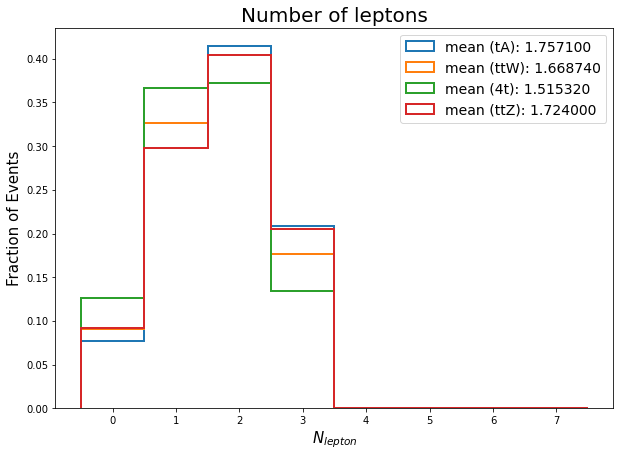

In [16]:
# Number of Leptons
plt.figure(figsize=(10, 7))
bin = np.linspace(-0.5, 7.5, 9)
plt.hist(ak.num(lepton_sort_pt_tA), bins=bin, density=True, histtype='step', linewidth=2, label='mean (tA): %f' %np.mean(ak.num(lepton_sort_pt_tA)))
plt.hist(ak.num(lepton_sort_pt_ttW), bins=bin, density=True, histtype='step', linewidth=2, label='mean (ttW): %f' %np.mean(ak.num(lepton_sort_pt_ttW)))
plt.hist(ak.num(lepton_sort_pt_tttt), bins=bin, density=True, histtype='step', linewidth=2, label='mean (4t): %f' %np.mean(ak.num(lepton_sort_pt_tttt)))
plt.hist(ak.num(lepton_sort_pt_ttZ), bins=bin, density=True, histtype='step', linewidth=2, label='mean (ttZ): %f' %np.mean(ak.num(lepton_sort_pt_ttZ)))

plt.legend(fontsize=14)
plt.xlabel(r'$N_{lepton}$' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Number of leptons', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

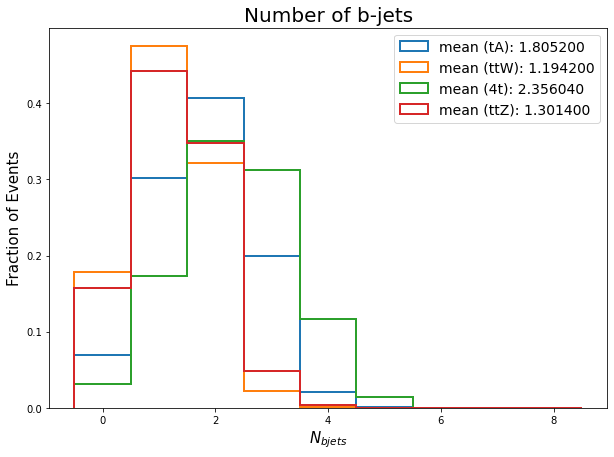

In [17]:
# Number of bjets
plt.figure(figsize=(10, 7))
bin = np.linspace(-0.5, 8.5, 10)
plt.hist(ak.count_nonzero(bjet_pt_tA, axis=-1), bins=bin, density=True, histtype='step', linewidth=2, label='mean (tA): %f' %ak.mean(ak.count_nonzero(bjet_pt_tA, axis=-1)))
plt.hist(ak.count_nonzero(bjet_pt_ttW, axis=-1), bins=bin, density=True, histtype='step', linewidth=2, label='mean (ttW): %f' %ak.mean(ak.count_nonzero(bjet_pt_ttW, axis=-1)))
plt.hist(ak.count_nonzero(bjet_pt_tttt, axis=-1), bins=bin, density=True, histtype='step', linewidth=2, label='mean (4t): %f' %ak.mean(ak.count_nonzero(bjet_pt_tttt, axis=-1)))
plt.hist(ak.count_nonzero(bjet_pt_ttZ, axis=-1), bins=bin, density=True, histtype='step', linewidth=2, label='mean (ttZ): %f' %ak.mean(ak.count_nonzero(bjet_pt_ttZ, axis=-1)))
plt.legend(fontsize=14)
plt.xlabel(r'$N_{bjets}$' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Number of b-jets', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10) 
plt.show()

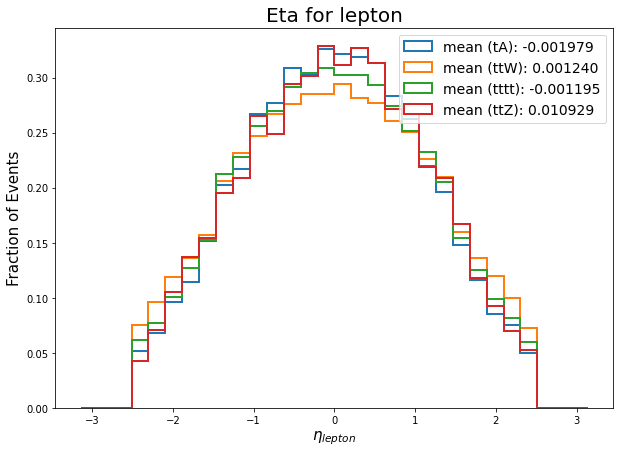

In [18]:
# Lepton Eta
plt.figure(figsize=(10, 7))
bin = np.linspace(-np.pi, np.pi, 31)
plt.hist(ak.flatten(lepton_eta_tA), bins=bin, density=True, histtype='step', linewidth=2, label='mean (tA): %f' %ak.mean(ak.flatten(lepton_eta_tA)))
plt.hist(ak.flatten(lepton_eta_ttW), bins=bin, density=True, histtype='step', linewidth=2, label='mean (ttW): %f' %ak.mean(ak.flatten(lepton_eta_ttW)))
plt.hist(ak.flatten(lepton_eta_tttt), bins=bin, density=True, histtype='step', linewidth=2, label='mean (tttt): %f' %ak.mean(ak.flatten(lepton_eta_tttt)))
plt.hist(ak.flatten(lepton_eta_ttZ), bins=bin, density=True, histtype='step', linewidth=2, label='mean (ttZ): %f' %ak.mean(ak.flatten(lepton_eta_ttZ)))
plt.legend(fontsize=14)
plt.xlabel(r'$η_{lepton}$' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Eta for lepton', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

100%|██████████| 5000/5000 [00:00<00:00, 5549.11it/s]


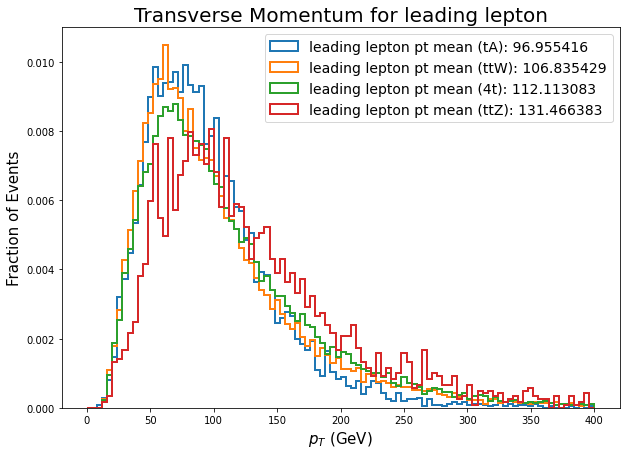

In [19]:
# Transverse Momentum of leading and subleading lepton
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 400, 101)
leading_lepton = []
for i in tqdm(range(EventSize_tA)):
    if len(lepton_sort_pt_tA[i]) >= 2:
        leading_lepton.append(lepton_sort_pt_tA[i][0])
plt.hist(leading_lepton, bins=bin, density=True, histtype='step', linewidth=2, label='leading lepton pt mean (tA): %f' %np.mean(leading_lepton))

leading_lepton = []
for i in tqdm(range(EventSize_ttW)):
    if len(lepton_sort_pt_ttW[i]) >= 2:
        leading_lepton.append(lepton_sort_pt_ttW[i][0])
plt.hist(leading_lepton, bins=bin, density=True, histtype='step', linewidth=2, label='leading lepton pt mean (ttW): %f' %np.mean(leading_lepton))

leading_lepton = []
for i in tqdm(range(EventSize_tttt)):
    if len(lepton_sort_pt_tttt[i]) >= 2:
        leading_lepton.append(lepton_sort_pt_tttt[i][0])
plt.hist(leading_lepton, bins=bin, density=True, histtype='step', linewidth=2, label='leading lepton pt mean (4t): %f' %np.mean(leading_lepton))

leading_lepton = []
for i in tqdm(range(EventSize_ttZ)):
    if len(lepton_sort_pt_ttZ[i]) >= 2:
        leading_lepton.append(lepton_sort_pt_ttZ[i][0])
plt.hist(leading_lepton, bins=bin, density=True, histtype='step', linewidth=2, label='leading lepton pt mean (ttZ): %f' %np.mean(leading_lepton))

plt.legend(fontsize=14)
plt.xlabel(r'$p_{T}$ (GeV)' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Transverse Momentum for leading lepton', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

100%|██████████| 5000/5000 [00:00<00:00, 5498.60it/s]


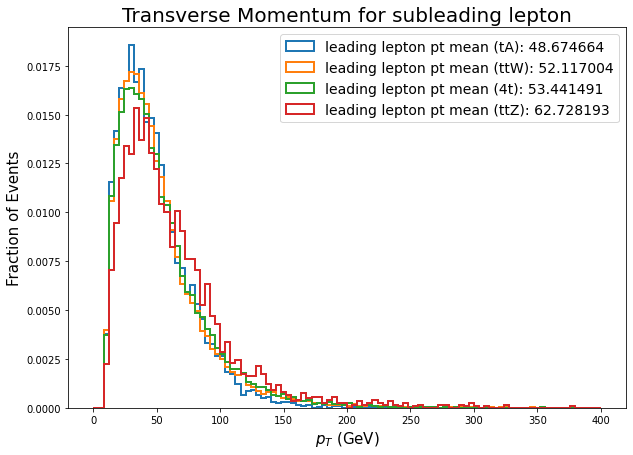

In [20]:
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 400, 101)
leading_lepton = []
for i in tqdm(range(EventSize_tA)):
    if len(lepton_sort_pt_tA[i]) >= 2:
        leading_lepton.append(lepton_sort_pt_tA[i][1])
plt.hist(leading_lepton, bins=bin, density=True, histtype='step', linewidth=2, label='leading lepton pt mean (tA): %f' %np.mean(leading_lepton))

leading_lepton = []
for i in tqdm(range(EventSize_ttW)):
    if len(lepton_sort_pt_ttW[i]) >= 2:
        leading_lepton.append(lepton_sort_pt_ttW[i][1])
plt.hist(leading_lepton, bins=bin, density=True, histtype='step', linewidth=2, label='leading lepton pt mean (ttW): %f' %np.mean(leading_lepton))

leading_lepton = []
for i in tqdm(range(EventSize_tttt)):
    if len(lepton_sort_pt_tttt[i]) >= 2:
        leading_lepton.append(lepton_sort_pt_tttt[i][1])
plt.hist(leading_lepton, bins=bin, density=True, histtype='step', linewidth=2, label='leading lepton pt mean (4t): %f' %np.mean(leading_lepton))

leading_lepton = []
for i in tqdm(range(EventSize_ttZ)):
    if len(lepton_sort_pt_ttZ[i]) >= 2:
        leading_lepton.append(lepton_sort_pt_ttZ[i][1])
plt.hist(leading_lepton, bins=bin, density=True, histtype='step', linewidth=2, label='leading lepton pt mean (ttZ): %f' %np.mean(leading_lepton))

plt.legend(fontsize=14)
plt.xlabel(r'$p_{T}$ (GeV)' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Transverse Momentum for subleading lepton', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

100%|██████████| 5000/5000 [00:10<00:00, 472.63it/s]


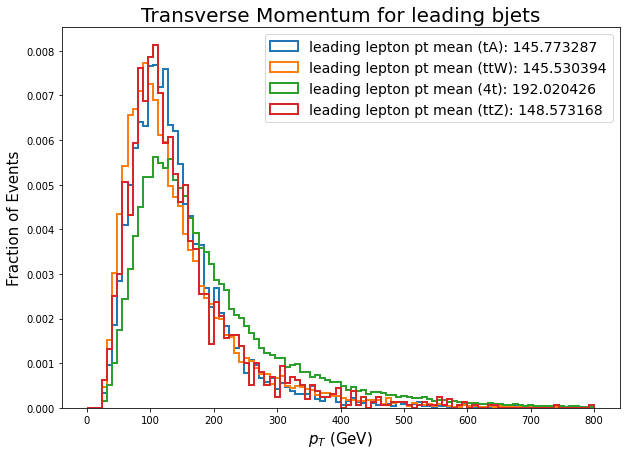

In [21]:
# Transverse Momentum of leading and subleading b-jet & Eta for b-jets
leading_bjet_tA, subleading_bjet_tA, eta_bjet_tA = [], [], []
for i in tqdm(range(EventSize_tA)):
    if len(bjet_pt_tA[i]) >= 2:
        b_pt, b_eta  = bjet_pt_tA[i], bjet_eta_tA[i]
        b_pt = b_pt[ak.where(b_pt)]
        b_eta = b_eta[ak.where(b_eta)]
        b_pt = ak.sort(b_pt, ascending=False)
        if len(b_pt) >= 2:
            leading_bjet_tA.append(b_pt[0])
            subleading_bjet_tA.append(b_pt[1])
            eta_bjet_tA.append(b_eta)
            
leading_bjet_ttW, subleading_bjet_ttW, eta_bjet_ttW = [], [], []
for i in tqdm(range(EventSize_ttW)):
    if len(bjet_pt_ttW[i]) >= 2:
        b_pt, b_eta  = bjet_pt_ttW[i], bjet_eta_ttW[i]
        b_pt = b_pt[ak.where(b_pt)]
        b_eta = b_eta[ak.where(b_eta)]
        b_pt = ak.sort(b_pt, ascending=False)
        if len(b_pt) >= 2:
            leading_bjet_ttW.append(b_pt[0])
            subleading_bjet_ttW.append(b_pt[1])
            eta_bjet_ttW.append(b_eta)
            
leading_bjet_tttt, subleading_bjet_tttt, eta_bjet_tttt = [], [], []
for i in tqdm(range(EventSize_tttt)):
    if len(bjet_pt_tttt[i]) >= 2:
        b_pt, b_eta  = bjet_pt_tttt[i], bjet_eta_tttt[i]
        b_pt = b_pt[ak.where(b_pt)]
        b_eta = b_eta[ak.where(b_eta)]
        b_pt = ak.sort(b_pt, ascending=False)
        if len(b_pt) >= 2:
            leading_bjet_tttt.append(b_pt[0])
            subleading_bjet_tttt.append(b_pt[1])
            eta_bjet_tttt.append(b_eta)
            
leading_bjet_ttZ, subleading_bjet_ttZ, eta_bjet_ttZ = [], [], []
for i in tqdm(range(EventSize_ttZ)):
    if len(bjet_pt_ttZ[i]) >= 2:
        b_pt, b_eta  = bjet_pt_ttZ[i], bjet_eta_ttZ[i]
        b_pt = b_pt[ak.where(b_pt)]
        b_eta = b_eta[ak.where(b_eta)]
        b_pt = ak.sort(b_pt, ascending=False)
        if len(b_pt) >= 2:
            leading_bjet_ttZ.append(b_pt[0])
            subleading_bjet_ttZ.append(b_pt[1])
            eta_bjet_ttZ.append(b_eta)
            
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 800, 101)
plt.hist(leading_bjet_tA, bins=bin, density=True, histtype='step', linewidth=2, label='leading lepton pt mean (tA): %f' %np.mean(leading_bjet_tA))
plt.hist(leading_bjet_ttW, bins=bin, density=True, histtype='step', linewidth=2, label='leading lepton pt mean (ttW): %f' %np.mean(leading_bjet_ttW))
plt.hist(leading_bjet_tttt, bins=bin, density=True, histtype='step', linewidth=2, label='leading lepton pt mean (4t): %f' %np.mean(leading_bjet_tttt))
plt.hist(leading_bjet_ttZ, bins=bin, density=True, histtype='step', linewidth=2, label='leading lepton pt mean (ttZ): %f' %np.mean(leading_bjet_ttZ))
plt.legend(fontsize=14)
plt.xlabel(r'$p_{T}$ (GeV)' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Transverse Momentum for leading bjets', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

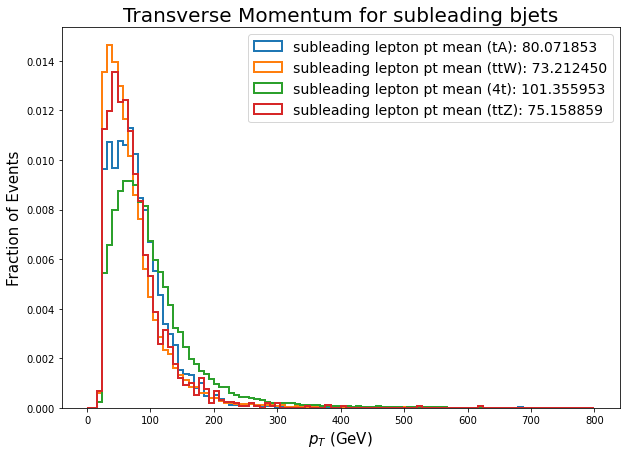

In [22]:
# Subleading bjet pt
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 800, 101)
plt.hist(subleading_bjet_tA, bins=bin, density=True, histtype='step', linewidth=2, label='subleading lepton pt mean (tA): %f' %np.mean(subleading_bjet_tA))
plt.hist(subleading_bjet_ttW, bins=bin, density=True, histtype='step', linewidth=2, label='subleading lepton pt mean (ttW): %f' %np.mean(subleading_bjet_ttW))
plt.hist(subleading_bjet_tttt, bins=bin, density=True, histtype='step', linewidth=2, label='subleading lepton pt mean (4t): %f' %np.mean(subleading_bjet_tttt))
plt.hist(subleading_bjet_ttZ, bins=bin, density=True, histtype='step', linewidth=2, label='subleading lepton pt mean (ttZ): %f' %np.mean(subleading_bjet_ttZ))
plt.legend(fontsize=14)
plt.xlabel(r'$p_{T}$ (GeV)' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Transverse Momentum for subleading bjets', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

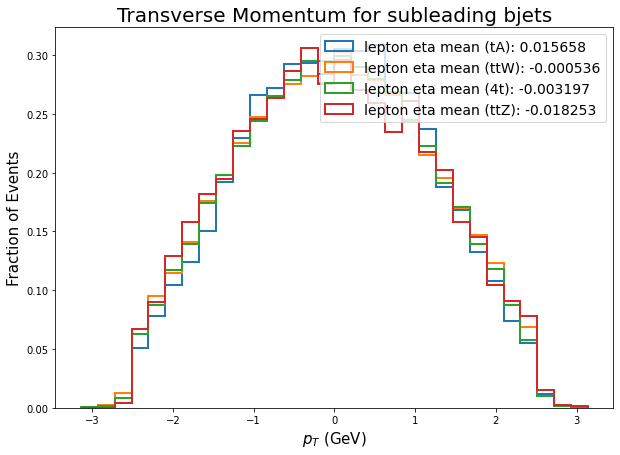

In [23]:
# Lepton Eta
plt.figure(figsize=(10, 7))
bin = np.linspace(-np.pi, np.pi, 31)
plt.hist(ak.flatten(eta_bjet_tA), bins=bin, density=True, histtype='step', linewidth=2, label='lepton eta mean (tA): %f' %ak.mean(ak.flatten(eta_bjet_tA)))
plt.hist(ak.flatten(eta_bjet_ttW), bins=bin, density=True, histtype='step', linewidth=2, label='lepton eta mean (ttW): %f' %ak.mean(ak.flatten(eta_bjet_ttW)))
plt.hist(ak.flatten(eta_bjet_tttt), bins=bin, density=True, histtype='step', linewidth=2, label='lepton eta mean (4t): %f' %ak.mean(ak.flatten(eta_bjet_tttt)))
plt.hist(ak.flatten(eta_bjet_ttZ), bins=bin, density=True, histtype='step', linewidth=2, label='lepton eta mean (ttZ): %f' %ak.mean(ak.flatten(eta_bjet_ttZ)))
plt.legend(fontsize=14)
plt.xlabel(r'$p_{T}$ (GeV)' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Transverse Momentum for subleading bjets', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

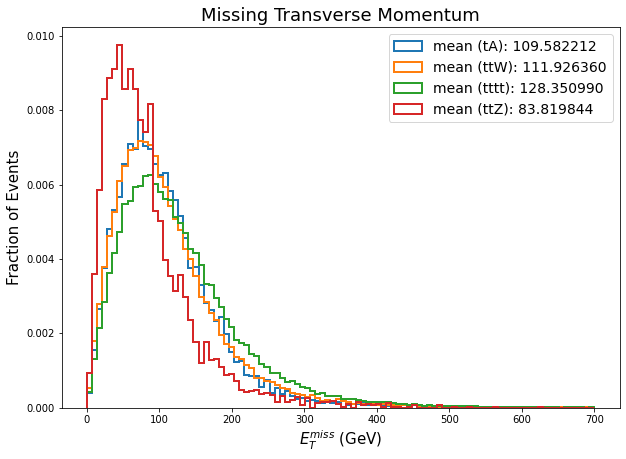

In [24]:
# Missing Transverse Momentum
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 700, 101)
plt.hist(ak.flatten(Emiss_tA, axis=-1), histtype='step', linewidth=2, density=True, bins=bin, label='mean (tA): %f' %ak.mean(ak.flatten(Emiss_tA)))
plt.hist(ak.flatten(Emiss_ttW), histtype='step', linewidth=2, density=True, bins=bin, label='mean (ttW): %f' %ak.mean(ak.flatten(Emiss_ttW)))
plt.hist(ak.flatten(Emiss_tttt), histtype='step', linewidth=2, density=True, bins=bin, label='mean (tttt): %f' %ak.mean(ak.flatten(Emiss_tttt)))
plt.hist(ak.flatten(Emiss_ttZ), histtype='step', linewidth=2, density=True, bins=bin, label='mean (ttZ): %f' %ak.mean(ak.flatten(Emiss_ttZ)))
plt.xlabel(r'$E_{T}^{miss}$ (GeV)', fontsize=15)
plt.ylabel('Fraction of Events', fontsize=15)
plt.title('Missing Transverse Momentum', fontsize=18)
plt.legend(fontsize=14)
plt.show()

100%|██████████| 5000/5000 [00:44<00:00, 113.34it/s]


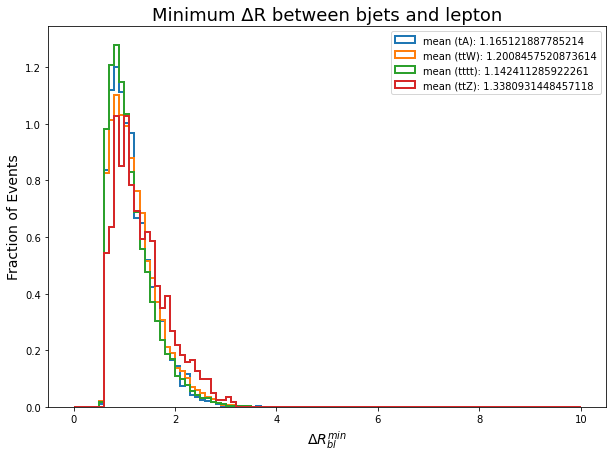

In [30]:
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 10, 101)
def DeltaRbl(EventSize, lepton_eta, lepton_phi, bjet_eta, bjet_phi, name):
    deltaR_bl = []
    for i in tqdm(range(EventSize)):
        lep_eta, lep_phi, b_eta, b_phi = lepton_eta[i], lepton_phi[i], bjet_eta[i], bjet_phi[i]
        b_eta, b_phi = b_eta[ak.where(b_eta)], b_phi[ak.where(b_phi)]
        if len(b_eta) >= 2 and len(lep_eta) >= 2:
            deltaeta_bl = np.array([i-j for i in b_eta for j in lep_eta])
            deltaphi_bl = np.abs([i-j for i in b_phi for j in lep_phi])
            deltaphi_bl = np.array([2*np.pi-i if i > np.pi else i for i in deltaphi_bl])
            deltaR_bl.append(min(fun(deltaeta_bl, deltaphi_bl)))
    plt.hist(deltaR_bl, bins=bin, histtype='step', linewidth=2, density=True, label=f'mean ({name}): {np.mean(deltaR_bl)}')

DeltaRbl(EventSize_tA, lepton_eta_tA, lepton_phi_tA, bjet_eta_tA, bjet_phi_tA, 'tA')
DeltaRbl(EventSize_ttW, lepton_eta_ttW, lepton_phi_ttW, bjet_eta_ttW, bjet_phi_ttW, 'ttW')
DeltaRbl(EventSize_tttt, lepton_eta_tttt, lepton_phi_tttt, bjet_eta_tttt, bjet_phi_tttt, 'tttt')
DeltaRbl(EventSize_ttZ, lepton_eta_ttZ, lepton_phi_ttZ, bjet_eta_ttZ, bjet_phi_ttZ, 'ttZ')

plt.xlabel(r'$ΔR_{bl}^{min}$', fontsize=14)
plt.ylabel('Fraction of Events', fontsize=14)
plt.title('Minimum \u0394R between bjets and lepton', fontsize=18)
plt.legend()
plt.show()

100%|██████████| 5000/5000 [00:23<00:00, 212.18it/s]


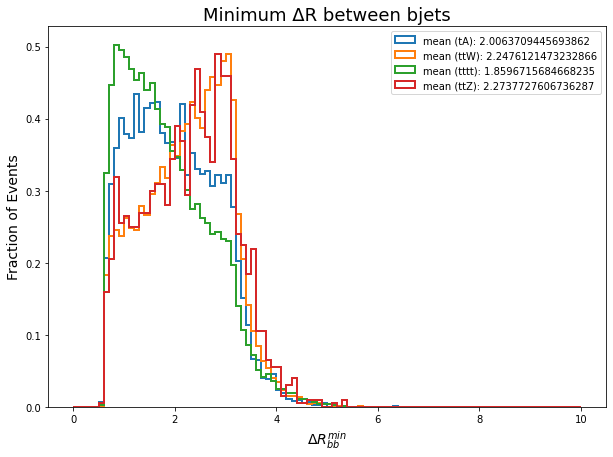

In [31]:
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 10, 101)
def DeltaRbb(EventSize, bjet_eta, bjet_phi, name):
    deltaR_bb = []
    for i in tqdm(range(EventSize)):
        b_eta, b_phi = bjet_eta[i], bjet_phi[i]
        b_eta, b_phi = b_eta[ak.where(b_eta)], b_phi[ak.where(b_phi)]
        if len(b_eta) >= 2:
            m = b_eta - b_eta[:, np.newaxis]
            deltaeta_bb = m[np.triu_indices(len(m[0]), k = 1)]
            m = b_phi - b_phi[:, np.newaxis]
            deltaphi_bb = np.abs(m[np.triu_indices(len(m[0]), k = 1)])
            deltaphi_bb = np.array([2*np.pi-i if i > np.pi else i for i in deltaphi_bb])
            deltaR_bb.append(min(fun(deltaeta_bb, deltaphi_bb)))
    plt.hist(deltaR_bb, bins=bin, histtype='step', linewidth=2, density=True, label=f'mean ({name}): {np.mean(deltaR_bb)}')

DeltaRbb(EventSize_tA, bjet_eta_tA, bjet_phi_tA, 'tA')
DeltaRbb(EventSize_ttW, bjet_eta_ttW, bjet_phi_ttW, 'ttW')
DeltaRbb(EventSize_tttt, bjet_eta_tttt, bjet_phi_tttt, 'tttt')
DeltaRbb(EventSize_ttZ, bjet_eta_ttZ, bjet_phi_ttZ, 'ttZ')

plt.xlabel(r'$ΔR_{bb}^{min}$', fontsize=14)
#plt.axvline(x=0.6, color='g', linestyle='--', label=r'cut')
plt.ylabel('Fraction of Events', fontsize=14)
plt.title('Minimum \u0394R between bjets', fontsize=18)
plt.legend()
plt.show()

100%|██████████| 5000/5000 [00:46<00:00, 107.16it/s]


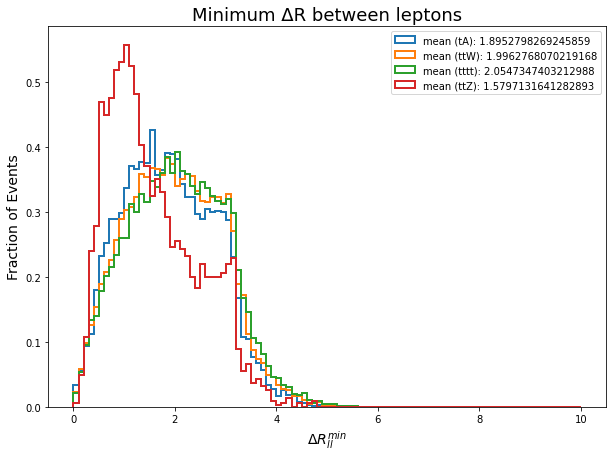

In [33]:
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 10, 101)
def DeltaRll(EventSize, lepton_eta, lepton_phi, name):
    deltaR_ll = []
    for i in tqdm(range(EventSize)):
        lep_eta, lep_phi = lepton_eta[i], lepton_phi[i]
        if len(lep_eta) >= 2:
            m = lep_eta - lep_eta[:, np.newaxis]
            deltaeta_ll = m[np.triu_indices(len(m[0]), k = 1)]
            m = lep_phi - lep_phi[:, np.newaxis]
            deltaphi_ll = np.abs(m[np.triu_indices(len(m[0]), k = 1)])
            deltaphi_ll = np.array([2*np.pi-i if i > np.pi else i for i in deltaphi_ll])
            deltaR_ll.append(min(fun(deltaeta_ll, deltaphi_ll)))
    plt.hist(deltaR_ll, bins=bin, histtype='step', linewidth=2, density=True, label=f'mean ({name}): {np.mean(deltaR_ll)}')

DeltaRll(EventSize_tA, lepton_eta_tA, lepton_phi_tA, 'tA')
DeltaRll(EventSize_ttW, lepton_eta_ttW, lepton_phi_ttW, 'ttW')
DeltaRll(EventSize_tttt, lepton_eta_tttt, lepton_phi_tttt, 'tttt')
DeltaRll(EventSize_ttZ, lepton_eta_ttZ, lepton_phi_ttZ, 'ttZ')

plt.xlabel(r'$ΔR_{ll}^{min}$', fontsize=14)
plt.ylabel('Fraction of Events', fontsize=14)
plt.title('Minimum \u0394R between leptons', fontsize=18)
plt.legend()
plt.show()

100%|██████████| 5000/5000 [00:05<00:00, 877.50it/s] 


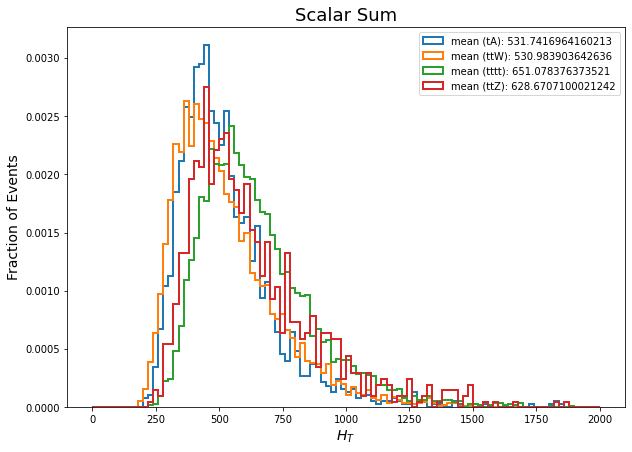

In [38]:
# HT of  leading leptons and three leading jets
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 2000, 101)
def HT(EventSize, lepton_sort_pt, jet_sort_pt, name):
    ht = []
    for i in tqdm(range(EventSize)):
        lep_pt, jet_pt = lepton_sort_pt[i], jet_sort_pt[i]
        if len(lep_pt) >= 3 and len(jet_pt) >= 3:
            ht.append(np.sum([lep_pt[0], lep_pt[1], lep_pt[2], jet_pt[0], jet_pt[1], jet_pt[2]]))
    plt.hist(ht, bins=bin, histtype='step', linewidth=2, density=True, label=f'mean ({name}): {np.mean(ht)}')
            
HT(EventSize_tA, lepton_sort_pt_tA, jet_sort_pt_tA, 'tA')
HT(EventSize_ttW, lepton_sort_pt_ttW, jet_sort_pt_ttW, 'ttW')
HT(EventSize_tttt, lepton_sort_pt_tttt, jet_sort_pt_tttt, 'tttt')
HT(EventSize_ttZ, lepton_sort_pt_ttZ, jet_sort_pt_ttZ, 'ttZ')

plt.xlabel(r'$H_{T}$', fontsize=14)
plt.ylabel('Fraction of Events', fontsize=14)
plt.title('Scalar Sum', fontsize=18)
plt.legend()
plt.show()